In [ ]:
import pandas as pd
import numpy as np
from nptdms import TdmsFile
import tensorflow as tf

In [ ]:
def create_dataset(
        # data_file: str,    
        seq_length: int, #5000
        X: np.ndarray, #np.array,
        Y: np.ndarray, #np.array,
        # Columns_X: str,
        # Columns_Y: str
):
    # if data_file.endswith('.csv'):
    #     Data = pd.read_csv(data_file)
    # elif data_file.endswith('.tdms'):
    #     tdms_file = TdmsFile.read(data_file)
    #     Data = tdms_file.as_dataframe()

    # X = np.array(Data[Columns_X])
    # Y = np.array(Data[Columns_Y])

    DATASET_SIZE = int(X.shape[0] / seq_length)

    mean_x = np.mean(X)
    std_x = np.std(X)
    X = (X-mean_x)/std_x

    X = np.expand_dims(X, axis = 1)
    Y = np.expand_dims(Y, axis = 1)

    dataset = tf.data.Dataset.from_tensor_slices(((X, tf.zeros_like(Y)), Y))
    dataset = dataset.batch(seq_length, drop_remainder=True)

    train_size = int(0.7 * DATASET_SIZE)
    val_size = int(0.15 * DATASET_SIZE)
    test_size = int(0.15 * DATASET_SIZE)

    full_dataset = dataset #tf.data.TFRecordDataset(FLAGS.input_file)
    full_dataset = full_dataset.shuffle(buffer_size=DATASET_SIZE)
    train_dataset = full_dataset.take(train_size)
    test_dataset = full_dataset.skip(train_size)
    val_dataset = test_dataset.skip(val_size)
    test_dataset = test_dataset.take(test_size)

    return train_dataset, test_dataset, val_dataset

In [2]:
def save_scaled_csv(arr, file):
    mean = np.mean(arr)
    std = np.std(arr)
    np.savetxt(file, (arr-mean)/std, delimiter = ",")

def save_csv(arr, file):
    np.savetxt(file, arr, delimiter = ",")


In [ ]:
for _ in range(len(col)):
    

In [10]:
import os
os.listdir(n_drive)

['Data_different_processparams_28_05_2025.tdms_index',
 'LongOU.tdms_index',
 'LongOUData.tdms_index',
 'Data_28_05_2025.tdms_index',
 'Data_different_processparams_28_05_2025.tdms',
 'Data_28_05_2025.tdms',
 'LongOUData.tdms',
 'LongOU.tdms']

In [36]:
# dir = '/home/qopt/Christian/Bachelors-Project---Christian-Lorentsen/Python/Atomspc/Processed_data/'
n_drive = '/mnt/N/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ/'
# test = TdmsFile.read(n_drive + "Data_different_processparams_28_05_2025.tdms").as_dataframe()

In [ ]:
['Data_processes_2025_06_03.tdms',
 'Data_diffent_process_params_2025_06_03.tdms',
 'LongOUData.tdms',
 'LongOU.tdms']

['Data_processes_2025_06_03.tdms',
 'Data_different_processparams_28_05_2025.tdms',
 'Data_28_05_2025.tdms',
 'Data_diffent_process_params_2025_06_03.tdms',
 'LongOUData.tdms',
 'LongOU.tdms']

In [ ]:
np.arange(10)[:2]

array([0, 1])

In [30]:
test

,/'SamplingRate500000Time10sBessel process'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #1'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #1'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #2'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #2'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #3'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #3'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #4'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #4'/'Dev1/ai1',...,/'SamplingRate500000Time10sBessel process #24'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #24'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #25'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #25'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #26'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #26'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #27'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #27'/'Dev1/ai1',/'SamplingRate500000Time10sBessel process #28'/'Dev1/ai0',/'SamplingRate500000Time10sBessel process #28'/'Dev1/ai1'
0,-2.672978,0.003842,-4.614995,0.206061,-5.096075,0.203485,-5.074823,0.204451,-4.975644,0.204451,...,-5.334683,0.203163,-4.693887,0.206061,-5.796445,0.201553,-4.770525,0.206061,-5.239047,0.203485
1,-2.673300,0.087885,-4.614351,0.089817,-5.099939,0.090139,-5.075467,0.089817,-4.976610,0.089495,...,-5.333717,0.089173,-4.693243,0.090461,-5.791293,0.090139,-4.772135,0.089173,-5.234539,0.089817
2,-2.672978,0.124916,-4.612741,0.125882,-5.103803,0.126526,-5.078365,0.126204,-4.975966,0.126526,...,-5.336294,0.126526,-4.690345,0.126204,-5.786462,0.126526,-4.761831,0.126526,-5.231319,0.126526
3,-2.673944,0.175470,-4.609521,0.175470,-5.103803,0.175148,-5.078687,0.175470,-4.976932,0.175470,...,-5.337904,0.175792,-4.690667,0.175470,-5.784852,0.175470,-4.764085,0.176114,-5.225201,0.175148
4,-2.672656,0.194146,-4.608877,0.194790,-5.115074,0.194790,-5.078687,0.195112,-4.970170,0.194468,...,-5.338226,0.194790,-4.690023,0.195112,-5.779378,0.194468,-4.758611,0.194468,-5.222302,0.195434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,-5.078365,4.976910,-4.303293,4.976910,-4.482972,4.976266,-4.855213,4.976266,-4.554136,4.976910,...,-4.251127,4.977232,-4.219571,4.976910,-4.293632,4.976266,-4.764407,4.976588,-4.726732,4.976266
4999996,-5.082873,4.975622,-4.302649,4.975300,-4.477498,4.974656,-4.855857,4.974978,-4.552848,4.974978,...,-4.255958,4.974656,-4.223113,4.974978,-4.288802,4.974656,-4.772457,4.974334,-4.726732,4.974978
4999997,-5.083517,5.000739,-4.305547,5.001383,-4.481684,5.001383,-4.856179,5.001061,-4.547696,5.001061,...,-4.250805,5.001383,-4.226011,5.001061,-4.288158,5.000739,-4.767949,5.001061,-4.728986,5.001383
4999998,-5.085449,4.978520,-4.302005,4.977876,-4.478464,4.978198,-4.856501,4.979164,-4.548340,4.978520,...,-4.255314,4.978842,-4.226011,4.978520,-4.288802,4.978198,-4.775033,4.978520,-4.730918,4.978520


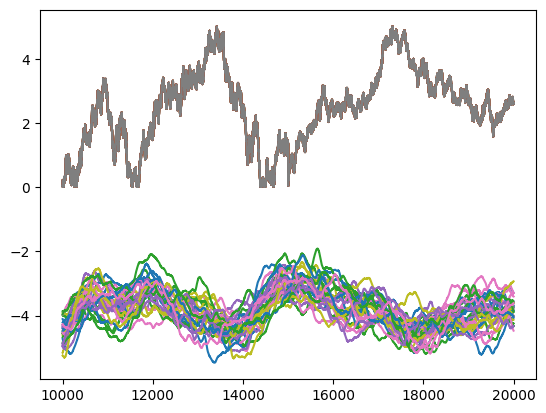

In [ ]:
import matplotlib.pyplot as plt
for col in test.columns:
    plt.plot(test[col][10_000:20_000], label = col)
    # plt.show()
# plt.legend()

In [13]:
cols = test.columns
X_cols = [x for x in cols if x.endswith('ai0\'')]
Y_cols = [x for x in cols if x.endswith('ai1\'')]

In [ ]:
save_scaled_csv(test[X_cols].to_numpy().flatten(), dir + "LongOUX.csv")
save_csv(test[Y_cols].to_numpy().flatten(), dir + "LongOUY.csv")